In [61]:
import numpy as np
import matplotlib.pyplot as plt
data = np.load('/content/drive/MyDrive/data.npy')

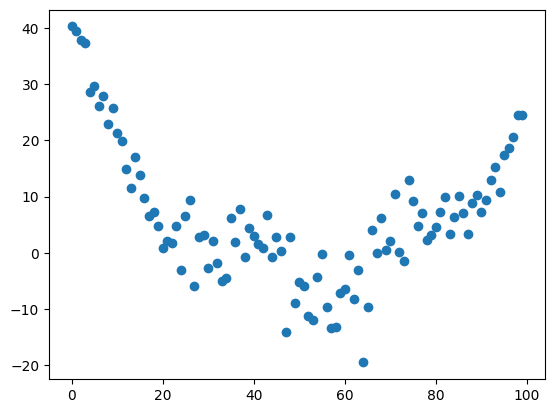

In [62]:
x = range(100)
plt.scatter(x, data)

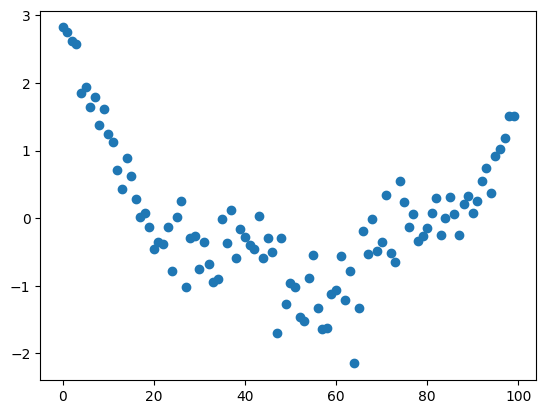

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data.reshape(-1, 1))
plt.scatter(x, data)

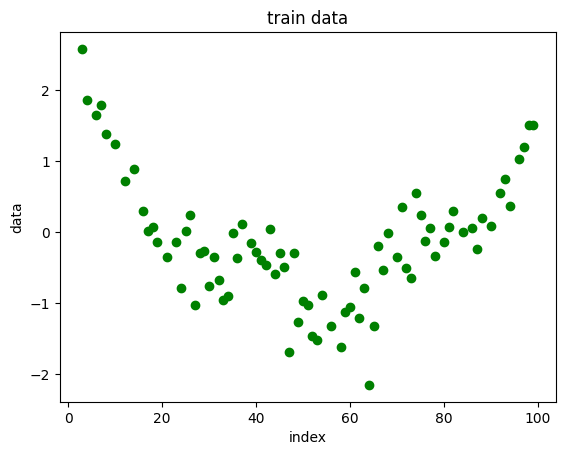

Text(0.5, 1.0, 'test data')

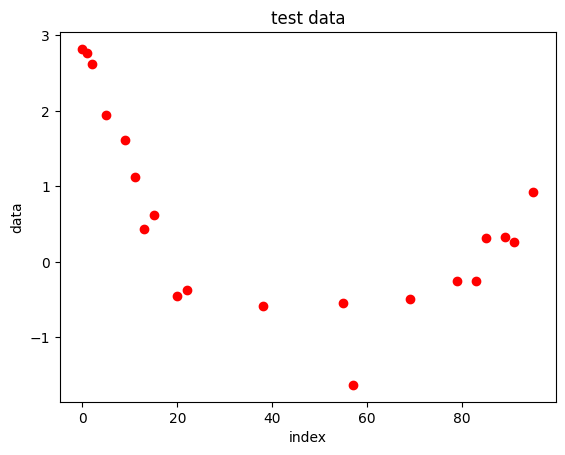

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, data, test_size=0.2, random_state=43)
plt.scatter(X_train, Y_train, color='green')
plt.xlabel('index')
plt.ylabel('data')
plt.title("train data")
plt.show()
plt.scatter(X_test, Y_test, color='red')
plt.xlabel('index')
plt.ylabel('data')
plt.title("test data")

In [65]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
def grad(x, y, w, b):
    dbb = 0
    dww = 0
    m = x.shape[0]
    costt = 0
    for ii in range(m):
        f_wb = w * x[ii] + b
        dbb = dbb + (f_wb - y[ii])
        dww = dww + (f_wb - y[ii]) * x[ii]
        costt = costt + (f_wb - y[ii]) ** 2
        #print(costt, (f_wb - y[ii]) ** 2)
    total_cost = 1 / (2 * m) * costt
    #print(total_cost)
    dbb = 1 / m * dbb
    dww = 1 / m * dww
    return total_cost, dbb, dww

In [ ]:
w0 = -1
b0 = 100
total_cost, db, dw = grad(X_train, Y_train, w0, b0)
print(total_cost, db, dw)

[1545.92475738] [48.75206681] [1788.56447843]


In [ ]:
for i in range(100000):
    total_cost, db, dw = grad(X_train, Y_train, w0, b0)
    b0 = b0 - 0.0005 * db
    w0 = w0 - 0.0005 * dw
    print(total_cost, db, dw)

Streaming output truncated to the last 5000 lines.
[0.38762782] [0.00082395] [-1.26032487e-05]
[0.38762782] [0.00082387] [-1.26019003e-05]
[0.38762782] [0.00082378] [-1.26005521e-05]
[0.38762782] [0.00082369] [-1.2599204e-05]
[0.38762782] [0.0008236] [-1.25978561e-05]
[0.38762782] [0.00082351] [-1.25965083e-05]
[0.38762782] [0.00082342] [-1.25951606e-05]
[0.38762782] [0.00082334] [-1.25938131e-05]
[0.38762782] [0.00082325] [-1.25924657e-05]
[0.38762782] [0.00082316] [-1.25911185e-05]
[0.38762782] [0.00082307] [-1.25897714e-05]
[0.38762782] [0.00082298] [-1.25884245e-05]
[0.38762782] [0.0008229] [-1.25870777e-05]
[0.38762782] [0.00082281] [-1.2585731e-05]
[0.38762782] [0.00082272] [-1.25843845e-05]
[0.38762782] [0.00082263] [-1.25830382e-05]
[0.38762782] [0.00082254] [-1.25816919e-05]
[0.38762782] [0.00082246] [-1.25803459e-05]
[0.38762782] [0.00082237] [-1.25789999e-05]
[0.38762782] [0.00082228] [-1.25776542e-05]
[0.38762782] [0.00082219] [-1.25763085e-05]
[0.38762782] [0.0008221] [-1.

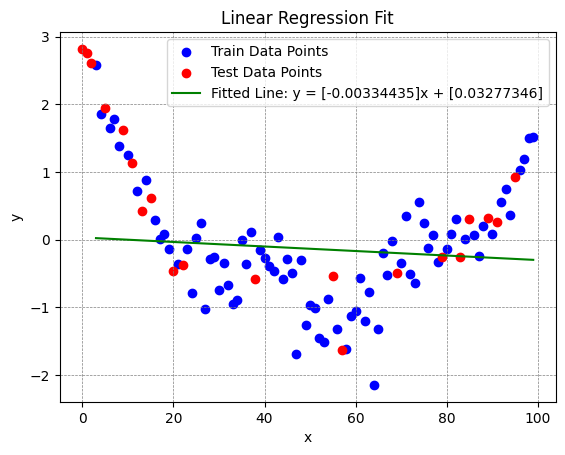

In [ ]:
x_line = np.linspace(min(X_train), max(X_train), 100)
y_line = w0 * x_line + b0
plt.scatter(X_train, Y_train, color='blue', label='Train Data Points')
plt.scatter(X_test, Y_test, color='red', label='Test Data Points')
plt.plot(x_line, y_line, color='green', label=f'Fitted Line: y = {w0}x + {b0}')
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
Y_pred = w0 * X_test + b0
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

MSE: 1.7744571991157332
MAE: 1.0095350590212147
R^2: -0.20065911626495003


In [ ]:
Tmse = []
Tmae = []
Tr2 = []
Tmset = []
Tmaet = []
Tr2t = []
for i in range(1,100):
    X_train, X_test, Y_train, Y_test = train_test_split(x, data, test_size=(100 - i)/100, random_state=43)
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    w0 = 0
    b0 = 0
    print(i)
    print(X_train.shape)
    for j in range(20000):
        #print('ok')
        total_cost, db, dw = grad(X_train, Y_train, w0, b0)
        b0 = b0 - 0.0001 * db
        w0 = w0 - 0.0001 * dw
    Y_pred = w0 * X_test + b0
    #print(Y_pred.shape)
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    Y_pred = w0 * X_train + b0
    mset = mean_squared_error(Y_train, Y_pred)
    maet = mean_absolute_error(Y_train, Y_pred)
    r2t = r2_score(Y_train, Y_pred)
    Tmse.append(mse)
    Tmae.append(mae)
    Tr2.append(r2)
    Tmset.append(mset)
    Tmaet.append(maet)
    Tr2t.append(r2t)

1
(1,)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


2
(2,)
3
(3,)
4
(4,)
5
(5,)
6
(6,)
7
(7,)
8
(8,)
9
(9,)
10
(10,)
11
(11,)
12
(12,)
13
(13,)
14
(14,)
15
(15,)
16
(16,)
17
(17,)
18
(18,)
19
(19,)
20
(20,)
21
(21,)
22
(22,)
23
(23,)
24
(24,)
25
(25,)
26
(26,)
27
(27,)
28
(28,)
29
(29,)
30
(30,)
31
(31,)
32
(32,)
33
(33,)
34
(34,)
35
(35,)
36
(36,)
37
(37,)
38
(38,)
39
(39,)
40
(40,)
41
(41,)
42
(42,)
43
(43,)
44
(43,)
45
(44,)
46
(46,)
47
(47,)
48
(48,)
49
(49,)
50
(50,)
51
(51,)
52
(52,)
53
(53,)
54
(54,)
55
(55,)
56
(56,)
57
(57,)
58
(58,)
59
(59,)
60
(60,)
61
(61,)
62
(62,)
63
(63,)
64
(64,)
65
(65,)
66
(66,)
67
(67,)
68
(68,)
69
(69,)
70
(70,)
71
(71,)
72
(71,)
73
(73,)
74
(74,)
75
(75,)
76
(76,)
77
(77,)
78
(78,)
79
(79,)
80
(80,)
81
(81,)
82
(82,)
83
(83,)
84
(84,)
85
(85,)
86
(85,)
87
(87,)
88
(88,)
89
(89,)
90
(90,)
91
(91,)
92
(92,)
93
(92,)
94
(94,)
95
(95,)
96
(96,)
97
(97,)
98
(98,)
99
(99,)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


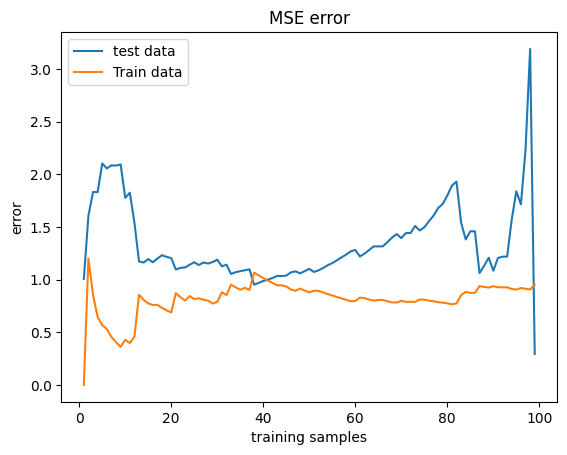

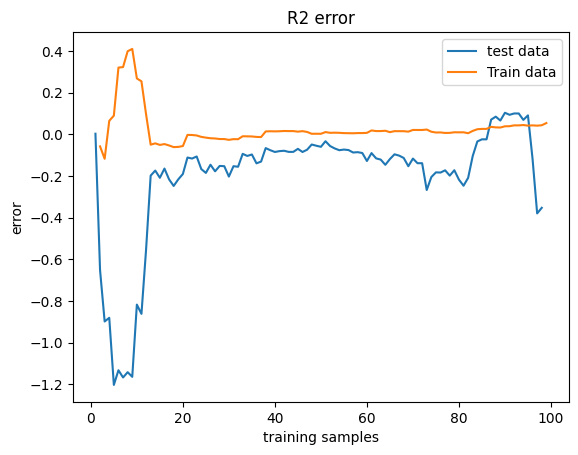

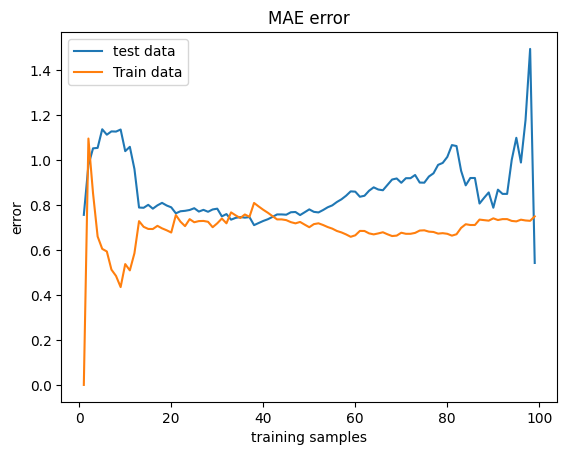

In [ ]:
metric_index = np.linspace(1, 99, 99)
plt.plot(metric_index, Tmse, label = 'test data')
plt.plot(metric_index, Tmset, label = 'Train data')
plt.xlabel("training samples")
plt.ylabel("error")
plt.legend()
plt.title("MSE error")
plt.show()
plt.plot(metric_index, Tr2, label = 'test data')
plt.plot(metric_index, Tr2t, label = 'Train data')
plt.xlabel("training samples")
plt.ylabel("error")
plt.legend()
plt.title("R2 error")
plt.show()
plt.plot(metric_index, Tmae, label = 'test data')
plt.plot(metric_index, Tmaet, label = 'Train data')
plt.xlabel("training samples")
plt.ylabel("error")
plt.legend()
plt.title("MAE error")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
mses = []
maes = []
r2s = []
for i in range(1, 7):
    poly = PolynomialFeatures(degree=i)
    X_new =  np.linspace(0, 99, 100)
    X_poly = poly.fit_transform(X_new.reshape(-1, 1))
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, data, test_size=0.2, random_state=43)
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    model = LinearRegression().fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    mses.append(mse)
    maes.append(mae)
    r2s.append(r2)


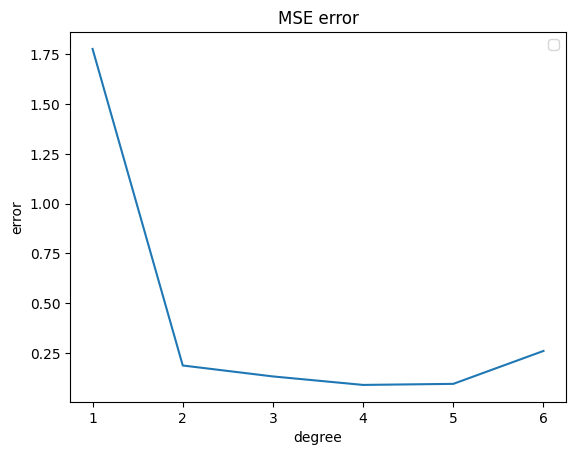

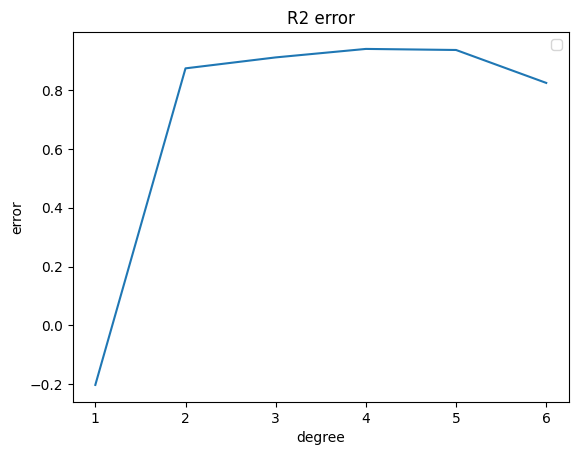

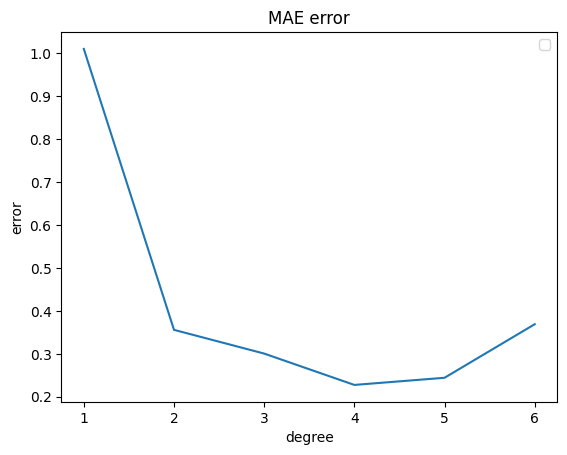

In [ ]:
plt.plot(range(1, 7), mses)
plt.xlabel("degree")
plt.ylabel("error")
plt.legend()
plt.title("MSE error")
plt.show()
plt.plot(range(1, 7), r2s)
plt.xlabel("degree")
plt.ylabel("error")
plt.legend()
plt.title("R2 error")
plt.show()
plt.plot(range(1, 7), maes)
plt.xlabel("degree")
plt.ylabel("error")
plt.legend()
plt.title("MAE error")
plt.show()

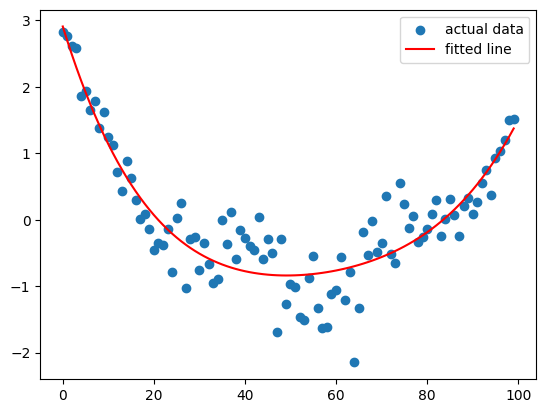

In [ ]:
x = np.linspace(0, 99, 100)
poly = PolynomialFeatures(degree=4)
model = LinearRegression().fit(poly.fit_transform(x.reshape(-1, 1)), data)
Y_pred = model.predict(poly.fit_transform(x.reshape(-1, 1)))
plt.scatter(x, data, label = 'actual data')
plt.plot(x, Y_pred, label = 'fitted line', color = 'red')
plt.legend()

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, Y_train, Y_test = train_test_split(x, data, test_size=0.2, random_state=43)
Y_train = Y_train.flatten()
Y_pred_lin = LinearRegression().fit(X_train.reshape(-1, 1), Y_train).predict(X_test.reshape(-1, 1))
Y_pred_ridge = Ridge(alpha=1.0).fit(X_train.reshape(-1, 1), Y_train).predict(X_test.reshape(-1, 1))
Y_pred_rf = RandomForestRegressor(n_estimators=100, random_state=43).fit(X_train.reshape(-1, 1), Y_train).predict(X_test.reshape(-1, 1))

NameError: name 'train_test_split' is not defined

In [ ]:
x`mse = mean_squared_error(Y_test, Y_pred_lin)
mae = mean_absolute_error(Y_test, Y_pred_lin)
r2 = r2_score(Y_test, Y_pred_lin)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

MSE: 1.776908277806887
MAE: 1.0099982013452427
R^2: -0.20231760088587136


In [ ]:
mse = mean_squared_error(Y_test, Y_pred_ridge)
mae = mean_absolute_error(Y_test, Y_pred_ridge)
r2 = r2_score(Y_test, Y_pred_ridge)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

MSE: 1.7769112962634146
MAE: 1.0099988128155766
R^2: -0.20231964327796104


In [ ]:
mse = mean_squared_error(Y_test, Y_pred_rf)
mae = mean_absolute_error(Y_test, Y_pred_rf)
r2 = r2_score(Y_test, Y_pred_rf)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

MSE: 0.10311313747096944
MAE: 0.2671814364825708
R^2: 0.9302300846856741


In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mses = []
maes = []
r2s = []
alpha = 1
X_train = X_train.reshape(-1, 1)
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = X_test.reshape(-1, 1)
X_test = np.c_[np.ones(X_test.shape[0]), X_test]
I = np.eye(2)
X_traspose = X_train.T
print(X_train.shape)
coeff = np.linalg.inv(X_traspose.dot(X_train) + alpha * I).dot(X_traspose).dot(Y_train)
Y_pred_L2 = X_test.dot(coeff)
mse = mean_squared_error(Y_test, Y_pred_L2)
mae = mean_absolute_error(Y_test, Y_pred_L2)
r2 = r2_score(Y_test, Y_pred_L2)
mses.append(mse)
maes.append(mae)
r2s.append(r2)
for i in range(2, 7):
    X_train = np.c_[X_train, X_train[:, 1] ** i]
    I = np.eye(i + 1)
    X_traspose = X_train.T
    coeff = np.linalg.inv(X_traspose.dot(X_train) + alpha * I).dot(X_traspose).dot(Y_train)
    X_test = np.c_[X_test, X_test[:, 1] ** i]
    Y_pred_L2 = X_test.dot(coeff)
    mse = mean_squared_error(Y_test, Y_pred_L2)
    mae = mean_absolute_error(Y_test, Y_pred_L2)
    r2 = r2_score(Y_test, Y_pred_L2)
    mses.append(mse)
    maes.append(mae)
    r2s.append(r2)

(80, 2)


In [54]:
mse = mean_squared_error(Y_test, Y_pred_L2)
mae = mean_absolute_error(Y_test, Y_pred_L2)
r2 = r2_score(Y_test, Y_pred_L2)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

MSE: 1.7787440764424975
MAE: 1.0103445998608893
R^2: -0.20355976573976076


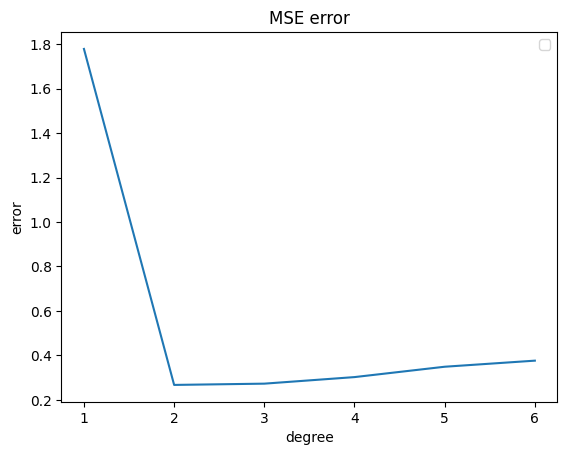

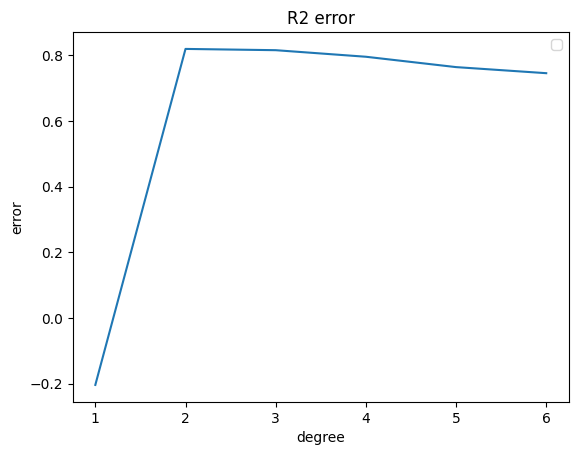

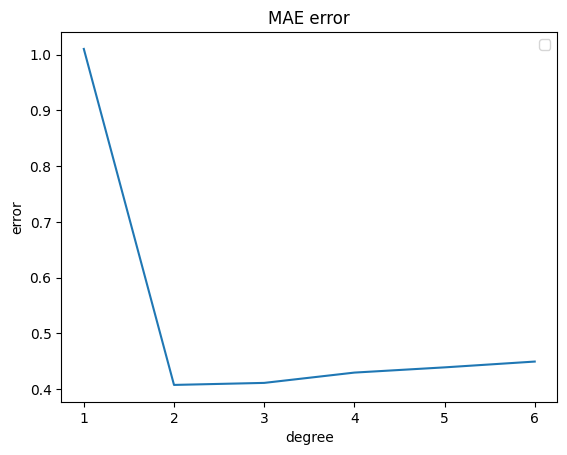

In [67]:
plt.plot(range(1, 7), mses)
plt.xlabel("degree")
plt.ylabel("error")
plt.legend()
plt.title("MSE error")
plt.show()
plt.plot(range(1, 7), r2s)
plt.xlabel("degree")
plt.ylabel("error")
plt.legend()
plt.title("R2 error")
plt.show()
plt.plot(range(1, 7), maes)
plt.xlabel("degree")
plt.ylabel("error")
plt.legend()
plt.title("MAE error")
plt.show()

In [24]:
np.c_[tmp, tmp[:,1]**2]

array([[1.000e+00, 4.400e+01, 1.936e+03],
       [1.000e+00, 1.200e+01, 1.440e+02],
       [1.000e+00, 7.800e+01, 6.084e+03],
       [1.000e+00, 9.400e+01, 8.836e+03],
       [1.000e+00, 3.700e+01, 1.369e+03],
       [1.000e+00, 9.200e+01, 8.464e+03],
       [1.000e+00, 9.700e+01, 9.409e+03],
       [1.000e+00, 5.600e+01, 3.136e+03],
       [1.000e+00, 6.300e+01, 3.969e+03],
       [1.000e+00, 4.600e+01, 2.116e+03],
       [1.000e+00, 8.000e+00, 6.400e+01],
       [1.000e+00, 3.300e+01, 1.089e+03],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 1.900e+01, 3.610e+02],
       [1.000e+00, 1.400e+01, 1.960e+02],
       [1.000e+00, 9.300e+01, 8.649e+03],
       [1.000e+00, 7.300e+01, 5.329e+03],
       [1.000e+00, 3.900e+01, 1.521e+03],
       [1.000e+00, 2.400e+01, 5.760e+02],
       [1.000e+00, 6.000e+00, 3.600e+01],
       [1.000e+00, 6.200e+01, 3.844e+03],
       [1.000e+00, 2.300e+01, 5.290e+02],
       [1.000e+00, 1.800e+01, 3.240e+02],
       [1.000e+00, 4.200e+01, 1.76

In [44]:
X_traspose

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.],
       [44., 12., 78., 94., 37., 92., 97., 56., 63., 46.,  8., 33., 45.,
        19., 

In [43]:
X_train.shape

(80, 3)